In [138]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [139]:
# Посмотрим, какие листы есть в этом файле
xls = pd.ExcelFile("Nedel_sred_cen.xlsx")
print(xls.sheet_names)

['Содержание', '2022', '2023', '2024', '2025']


In [140]:
#Отбросим содержание, прочитаем только листы с данными
sheet_names = xls.sheet_names 
sheets_to_read = sheet_names[1:]
all_sheets = pd.read_excel("Nedel_sred_cen.xlsx", sheet_name=sheets_to_read, skiprows=3)

In [141]:
# Посмотрим на данные
all_sheets["2022"]

,Наименование,на 10 января,на 14 января,на 21 января,на 28 января,на 4 февраля,на 11 февраля,на 18 февраля,на 25 февраля,на 4 марта,...,на 24 октября,на 31 октября,на 7 ноября,на 14 ноября,на 21 ноября,на 28 ноября,на 5 декабря,на 12 декабря,на 19 декабря,на 26 декабря
0,"Говядина (кроме бескостного мяса), кг",415.98,417,418.04,419.4,424.53,425.41,426.85,428.51,432.61,...,479.24,479.81,479.73,480.87,481.13,481.51,481.53,481.89,482.81,484.17
1,"Свинина (кроме бескостного мяса), кг",309.36,308.54,308.44,309,308.1,307.34,306.76,306.08,306.74,...,309.21,309.56,309.27,308.36,307.72,308.58,308.26,308.35,307.54,307.92
2,"Баранина (кроме бескостного мяса), кг",504.45,504.63,506.76,508.39,497.9,498.92,500.72,501.81,502.89,...,549.94,549.22,549.7,549.55,550.42,550.82,551,552.94,553.16,552.77
3,"Куры охлажденные и мороженые, кг",182.12,181.35,180.36,179.89,180.11,179.72,179.62,179.3,179.2,...,181.77,181.65,181.41,180.71,180.39,179.7,179.21,178.47,177.81,178.22
4,"Сосиски, сардельки, кг",433.27,432.54,434.56,435.28,433.59,432.49,434.93,435.64,436.34,...,467.7,468.42,468.97,467.21,465.97,467.78,469.15,468.31,467.96,469.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Услуги по снабжению электроэнергией,393.8,393.73,393.73,393.73,393.32,393.32,393.32,393.32,393.32,...,411.22,411.22,411.22,411.22,411.22,411.22,445.33,446.2,446.2,446.29
105,"Поездка на отдых в Турцию, поездка",28889.45,29009.93,29706.51,30654.32,30171.53,28325.12,30264.52,32466.65,41776.17,...,…,…,…,…,…,…,…,…,…,…
106,"Санаторий, день",3268.53,3272.32,3291.64,3303.25,3377.07,3380.21,3380.07,3379.38,3403.6,...,3758.05,3757.36,3720.15,3708.31,3709.42,3708.62,3701.3,3706.08,3715.79,3729.98
107,"Дом отдыха, пансионат, день",2026,2018.47,2028.12,2032.22,2305.78,2307.08,2308.69,2308.65,2283.68,...,2416.04,2398.23,2385.96,2390.71,2381.75,2378.1,2369.65,2368.53,2367.83,2375.25


In [142]:
# Уберем строки с пропусками
for sheet_name, df in all_sheets.items():
    all_sheets[sheet_name] = df.dropna()
    all_sheets[sheet_name] = df.set_index('Наименование')


In [143]:
# Приведем все заголовки к единому виду: "на 10 января" -> "10.01.2022" в формате datetime64[ns]
month_map = {
    'января': 1,
    'февраля': 2,
    'марта': 3,
    'апреля': 4,
    'мая': 5,
    'июня': 6,
    'июля': 7,
    'августа': 8,
    'сентября': 9,
    'октября': 10,
    'ноября': 11,
    'декабря': 12
}
for sheet_name, df in all_sheets.items():
    match = re.search(r'\d{4}', sheet_name)
    if not match:
        continue
    year = int(match.group())
    new_columns = []
    for col in df.columns:
        match = re.match(r'на\s+(\d{1,2})\s+([а-яА-Я]+)', str(col).strip().lower())
        if match:
            day = int(match.group(1))
            month_name = match.group(2)
            month = month_map[month_name.lower()]
            date_obj = datetime(year, month, day)
            new_columns.append(date_obj.strftime("%d.%m.%Y"))
        else:
            new_columns.append(col)  # не дата — оставить как есть

    df.columns = new_columns  # заменить заголовки
    all_sheets[sheet_name] = df  # сохранить обратно


In [144]:
# Посмотрим, как теперь выглядят заголовки
df_2022 = all_sheets['2022']
df_2022.head()

,10.01.2022,14.01.2022,21.01.2022,28.01.2022,04.02.2022,11.02.2022,18.02.2022,25.02.2022,04.03.2022,11.03.2022,...,24.10.2022,31.10.2022,07.11.2022,14.11.2022,21.11.2022,28.11.2022,05.12.2022,12.12.2022,19.12.2022,26.12.2022
Наименование,,,,,,,,,,,,,,,,,,,,,
"Говядина (кроме бескостного мяса), кг",415.98,417,418.04,419.4,424.53,425.41,426.85,428.51,432.61,436.44,...,479.24,479.81,479.73,480.87,481.13,481.51,481.53,481.89,482.81,484.17
"Свинина (кроме бескостного мяса), кг",309.36,308.54,308.44,309,308.1,307.34,306.76,306.08,306.74,310.69,...,309.21,309.56,309.27,308.36,307.72,308.58,308.26,308.35,307.54,307.92
"Баранина (кроме бескостного мяса), кг",504.45,504.63,506.76,508.39,497.9,498.92,500.72,501.81,502.89,503.43,...,549.94,549.22,549.7,549.55,550.42,550.82,551,552.94,553.16,552.77
"Куры охлажденные и мороженые, кг",182.12,181.35,180.36,179.89,180.11,179.72,179.62,179.3,179.2,179.94,...,181.77,181.65,181.41,180.71,180.39,179.7,179.21,178.47,177.81,178.22
"Сосиски, сардельки, кг",433.27,432.54,434.56,435.28,433.59,432.49,434.93,435.64,436.34,438.29,...,467.7,468.42,468.97,467.21,465.97,467.78,469.15,468.31,467.96,469.75


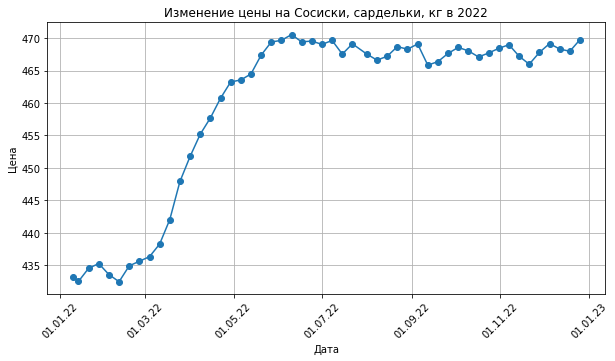

In [154]:
sosiges = 'Сосиски, сардельки, кг'
row_sosiges = df_2022.loc[sosiges]
prices = row_sosiges.values
row_sosiges.index = pd.to_datetime(row_sosiges.index, dayfirst=True)


plt.figure(figsize=(10, 5))
plt.plot(row_sosiges.index, prices, marker='o')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))

plt.title(f'Изменение цены на {sosiges} в 2022')
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.show()
